Perkenalan :

Nama : Doni Siahaan 
Batch 006

Problem : Dari sebuah gambar, gunakan konsep gradien untuk mendeteksi edge pada gambar dan lakukan operasi perkalian matriks pada gambar.


#Import Pustaka

In [40]:
#import pustaka/library
import pandas as pd
import numpy as np
import scipy as sy
import matplotlib.pyplot as plt
from PIL import Image

#Data Loading

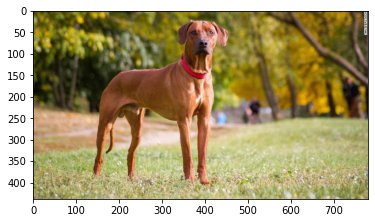

In [41]:
pict=plt.imread('/content/image.jpg')
plt.imshow(pict)

In [42]:
m_pict = plt.imread("/content/image.jpg")
m_pict


array([[[ 86,  93,  39],
        [ 88,  93,  39],
        [ 87,  90,  33],
        ...,
        [ 48,  41,  15],
        [ 46,  39,  10],
        [ 59,  52,  23]],

       [[ 77,  84,  30],
        [ 77,  84,  30],
        [ 78,  83,  25],
        ...,
        [ 46,  39,  13],
        [ 64,  57,  29],
        [ 37,  30,   1]],

       [[ 64,  73,  20],
        [ 66,  73,  19],
        [ 68,  73,  17],
        ...,
        [ 56,  48,  25],
        [ 44,  37,   9],
        [ 70,  60,  33]],

       ...,

       [[165, 151, 106],
        [159, 144, 101],
        [151, 134,  91],
        ...,
        [150, 139,  85],
        [149, 138,  84],
        [145, 134,  80]],

       [[164, 149, 106],
        [157, 142,  99],
        [149, 131,  91],
        ...,
        [155, 143,  93],
        [153, 141,  89],
        [148, 136,  84]],

       [[164, 149, 108],
        [157, 142, 101],
        [146, 131,  90],
        ...,
        [160, 148, 100],
        [157, 145,  97],
        [150, 138,  90]]

In [43]:
m_pict.shape

(438, 780, 3)

#Data Proses

In [44]:
#Merubah gambar menjadi grey
R=m_pict[:,:,0]
G=m_pict[:,:,1]
B=m_pict[:,:,2]
grey=(0.3 * R) + (0.59 * G) + (0.11 * B)
grey

array([[ 84.96,  85.56,  82.83, ...,  40.24,  37.91,  50.91],
       [ 75.96,  75.96,  75.12, ...,  38.24,  56.02,  28.91],
       [ 64.47,  64.96,  65.34, ...,  47.87,  36.02,  60.03],
       ...,
       [150.25, 143.77, 134.37, ..., 136.36, 135.36, 131.36],
       [148.77, 141.77, 132.  , ..., 141.1 , 138.88, 133.88],
       [148.99, 141.99, 130.99, ..., 146.32, 143.32, 136.32]])

In [45]:
grey.shape

(438, 780)

In [46]:
#Menghitung parsial/Gradien
grad_dx,grad_dy=np.gradient(grey)
grad_dx

array([[ -9.   ,  -9.6  ,  -7.71 , ...,  -2.   ,  18.11 , -22.   ],
       [-10.245, -10.3  ,  -8.745, ...,   3.815,  -0.945,   4.56 ],
       [ -8.745,  -9.   ,  -7.89 , ..., 107.225, -13.89 ,  20.17 ],
       ...,
       [ -0.74 ,  -2.245,  -2.685, ...,   1.98 ,   1.37 ,   0.87 ],
       [ -0.63 ,  -0.89 ,  -1.69 , ...,   4.98 ,   3.98 ,   2.48 ],
       [  0.22 ,   0.22 ,  -1.01 , ...,   5.22 ,   4.44 ,   2.44 ]])

In [47]:
grad_dy

array([[  0.6  ,  -1.065,  -2.62 , ...,  -1.59 ,   5.335,  13.   ],
       [  0.   ,  -0.42 ,  -0.82 , ...,   5.855,  -4.665, -27.11 ],
       [  0.49 ,   0.435,   0.675, ...,  -3.145,   6.08 ,  24.01 ],
       ...,
       [ -6.48 ,  -7.94 ,  -9.385, ...,   1.24 ,  -2.5  ,  -4.   ],
       [ -7.   ,  -8.385,  -8.385, ...,   0.39 ,  -3.61 ,  -5.   ],
       [ -7.   ,  -9.   ,  -8.885, ...,  -0.315,  -5.   ,  -7.   ]])

In [48]:
#2.menghitung gradient magnitude dengan rumus:
gradM= np.sqrt((grad_dx**2)+(grad_dy**2))
gradM

array([[  9.01997783,   9.65889357,   8.14300313, ...,   2.55501468,
         18.87946835,  25.55386468],
       [ 10.245     ,  10.30855955,   8.78336069, ...,   6.98822223,
          4.75975314,  27.49082938],
       [  8.75871709,   9.01050637,   7.91882093, ..., 107.27111284,
         15.16240416,  31.35775821],
       ...,
       [  6.52211622,   8.2512802 ,   9.76152908, ...,   2.33623629,
          2.85077183,   4.09351927],
       [  7.02829282,   8.43210087,   8.55361473, ...,   4.99524774,
          5.37331369,   5.58125434],
       [  7.00345629,   9.00268849,   8.94222148, ...,   5.22949567,
          6.68682286,   7.41306954]])

In [49]:
#3.Jika nilaimagnitude melebihiangkathreshold, makaedge terdeteksi(Biasanyathreshold ~ 30)
edge_pict = np.where(gradM > 30, 1, 0)
edge_pict

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

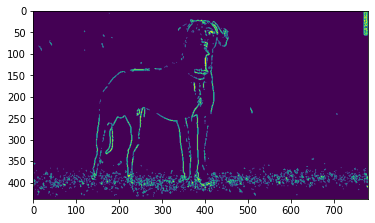

In [50]:
plt.imshow(edge_pict)

In [51]:
#4. buat matriks dengan nilai apapun(random)
#yang bersesuaian dengan ukuran gambar(gambar awal) dan sesuai dengan aturan perkalian matriks.
m_rdm=np.random.random((438, 780, 3))
m_rdm

array([[[0.99872477, 0.56080866, 0.46260353],
        [0.60197175, 0.69666777, 0.02406204],
        [0.14960285, 0.17973623, 0.01635714],
        ...,
        [0.66064959, 0.7932004 , 0.61367524],
        [0.22012384, 0.62853926, 0.26563049],
        [0.85698684, 0.75291541, 0.2279118 ]],

       [[0.95735243, 0.61865149, 0.30659628],
        [0.61749298, 0.90773702, 0.62469313],
        [0.49228006, 0.255043  , 0.89279492],
        ...,
        [0.60051444, 0.46037682, 0.36574173],
        [0.79581126, 0.05791481, 0.86678542],
        [0.54981486, 0.75181034, 0.71609404]],

       [[0.43217348, 0.09217194, 0.01304127],
        [0.59877191, 0.69446206, 0.68130564],
        [0.28216655, 0.32038665, 0.10189452],
        ...,
        [0.87070713, 0.31551054, 0.01831882],
        [0.45634671, 0.71953754, 0.55751192],
        [0.14973093, 0.21662421, 0.66176783]],

       ...,

       [[0.0722759 , 0.59837967, 0.14614862],
        [0.06266748, 0.40481493, 0.71095652],
        [0.21286816, 0

In [52]:
#gambar awal*gambar random
mar= m_pict*m_rdm
mar

array([[[ 85.89033011,  52.15520555,  18.04153751],
        [ 52.97351389,  64.79010218,   0.93841937],
        [ 13.0154477 ,  16.17626058,   0.53978555],
        ...,
        [ 31.71118019,  32.52121657,   9.20512866],
        [ 10.12569651,  24.51303116,   2.65630491],
        [ 50.56222371,  39.15160152,   5.24197135]],

       [[ 73.7161373 ,  51.96672475,   9.19788852],
        [ 47.54695934,  76.24990984,  18.74079398],
        [ 38.39784476,  21.16856916,  22.31987309],
        ...,
        [ 27.62366427,  17.95469602,   4.75464245],
        [ 50.93192033,   3.30114394,  25.13677714],
        [ 20.34314971,  22.55431019,   0.71609404]],

       [[ 27.65910252,   6.72855146,   0.26082532],
        [ 39.51894638,  50.69573016,  12.94480721],
        [ 19.18732573,  23.38822518,   1.73220683],
        ...,
        [ 48.75959945,  15.14450606,   0.45797058],
        [ 20.07925509,  26.62288904,   5.01760728],
        [ 10.48116482,  12.99745277,  21.83833824]],

       ...,

      

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


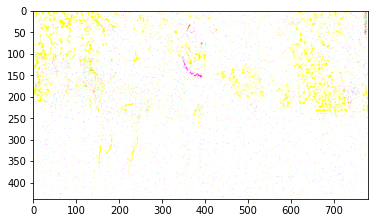

In [53]:
plt.imshow(mar)

#hasil dan Kesimpulan

Hasil kesimpulan dari pengukuran edge suatu gambar dan operasi perkalian matriks yang tercermin dalam gradient magnitude maka semakin besar threshold semakin jelas gradient yang tercermin. begitu pula sebaliknya semakin kecil thershold semakin samar gradient yang tercermin.
